<!--NOTEBOOK_HEADER-->
*This notebook contains material from [PyRosetta](https://RosettaCommons.github.io/PyRosetta.notebooks);
content is available [on Github](https://github.com/RosettaCommons/PyRosetta.notebooks.git).*

<!--NAVIGATION-->
< [Getting spatial features from a Pose](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/02.04-Getting-Spatial-Features-from-Pose.ipynb) | [Contents](toc.ipynb) | [Index](index.ipynb) | [Visualization with the `PyMOLMover`](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/02.06-Visualization-and-PyMOL-Mover.ipynb) ><p><a href="https://colab.research.google.com/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/02.05-Protein-Geometry.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Protein Geometry
Keywords: pose_from_sequence(), bond_angle(), set_phi(), set_psi(), xyz()

In [ ]:
# Notebook setup
import sys
if 'google.colab' in sys.modules:
    !pip install pyrosettacolabsetup
    import pyrosettacolabsetup
    pyrosettacolabsetup.setup()
    print ("Notebook is set for PyRosetta use in Colab.  Have fun!")

In [7]:
from pyrosetta import *
from pyrosetta.teaching import *
init()

core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python36.mac r208 2019.04+release.fd666910a5e fd666910a5edac957383b32b3b4c9d10020f34c1 http://www.pyrosetta.org 2019-01-22T15:55:37
core.init: command: PyRosetta -ex1 -ex2aro -database /Users/kathyle/Computational Protein Prediction and Design/PyRosetta4.Release.python36.mac.release-208/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=1321341383 seed_offset=0 real_seed=1321341383
core.init.random: RandomGenerator:init: Normal mode, seed=1321341383 RG_type=mt19937


**From previous section:**
Make sure you are in the directory with the pdb files:

`cd google_drive/My\ Drive/student-notebooks/`

In [8]:
pose = pose_from_pdb("inputs/5tj3.pdb")
resid = pose.pdb_info().pdb2pose('A', 28)
res_28 = pose.residue(resid)
N28 = AtomID(res_28.atom_index("N"), resid)
CA28 = AtomID(res_28.atom_index("CA"), resid)
C28 = AtomID(res_28.atom_index("C"), resid)

core.import_pose.import_pose: File '5tj3.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD1 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD2 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 353
core.conformation.Conformation: [ WARNING

## Rosetta Database Files

Let's take a look at Rosetta's ideal values for this amino acid's bond lengths and see how these values compare. First find Pyrosetta's database directory on your computer (hint: it should have shown up when you ran `init()` at the beginning of this Jupyter notebook.) Here's an example:

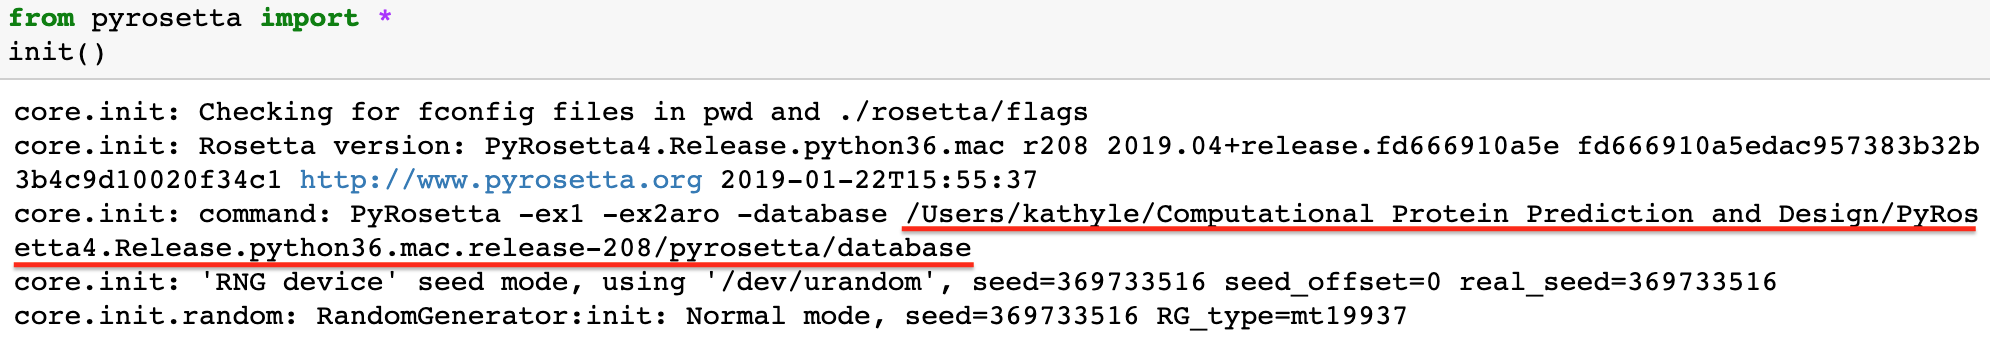

In [1]:
from IPython.display import Image
Image('./Media/init-path.png',width='700')

Head to the subdirectory `chemical/residue_type_sets/fa_standard/` to find the residue you're looking at. Let's look at valine, which can be found in the `l-caa` folder, since it is a standard amino acid. The `ICOOR_INTERNAL` lines will provide torsion angles, bond angles, and bond lengths between subsequent atoms in this residue. From this you should be able to deduce Rosetta's ideal $N$-$C_\alpha$ and $C_\alpha$-$C$ bond lengths.

These ideal values would for instance be used if we generated a new pose from an amino acid sequence. In fact, let's try that here:

In [9]:
one_res_seq = "V"
pose_one_res = pose_from_sequence(one_res_seq)
print(pose_one_res.sequence())

V


In [10]:
N_xyz = pose_one_res.residue(1).xyz("N")
CA_xyz = pose_one_res.residue(1).xyz("CA")
C_xyz = pose_one_res.residue(1).xyz("C")
print((CA_xyz - N_xyz).norm())
print((CA_xyz - C_xyz).norm())

1.458004
1.52326


Now lets figure out how to get angles in the protein. If the `Conformation` class has the angle we're looking for, we can use the AtomID objects we've already created:

In [11]:
angle = pose.conformation().bond_angle(N28, CA28, C28)
print(angle)

1.913188766577386


Notice that `.bond_angle()` gives us the angle in radians. We can compute the above angle in degrees:

In [12]:
import math
angle*180/math.pi

109.61764173672383

Note how this compares to the expected angle based on a tetrahedral geometry for the $C_\alpha$ carbon.

### Exercise 5: Calculating psi angle

Try to calculate this angle using the xyz atom positions for N, CA, and C of residue A:28 in the protein. You can use the `Vector` function `v3 = v1.dot(v2)` along with `v1.norm()`. The vector angle between two vectors BA and BC is $\cos^{-1}(\frac{BA \cdot BC}{|BA| |BC|})$.

## Manipulating Protein Geometry

We can also alter the geometry of the protein, with particular interest in manipulating the protein backbone and $\chi$ dihedrals.

### Exercise 6: Changing phi/psi angles

Perform each of the following manipulations, and give the coordinates of the CB atom of Pose residue 2 afterward.
- Set the $\phi$ of residue 2 to -60
- Set the $\psi$ of residue 2 to -43

In [13]:
# three alanines
tripeptide = pose_from_sequence("AAA")

orig_phi = tripeptide.phi(2)
orig_psi = tripeptide.psi(2)
print("original phi:", orig_phi)
print("original psi:", orig_psi)

# print the xyz coordinates of the CB atom of residue 2 here BEFORE setting
### BEGIN SOLUTION
print("xyz coordinates:", tripeptide.residue(2).xyz("CB"))
### END SOLUTION

original phi: 180.0
original psi: 180.0
xyz coordinates:       3.535270304899897       3.659035776744378       1.199094204197625


In [14]:
# set the phi and psi here
### BEGIN SOLUTION
tripeptide.set_phi(2, -60)
tripeptide.set_psi(2, -43)

print("new phi:", tripeptide.phi(2))
print("new psi:", tripeptide.psi(2))
### END SOLUTION


new phi: -60.0
new psi: -43.0


In [15]:
# print the xyz coordinates of the CB atom of residue 2 here AFTER setting
### BEGIN SOLUTION
print("xyz coordinates:", tripeptide.residue(2).xyz("CB"))
### END SOLUTION
# did changing the phi and psi angle change the xyz coordinates of the CB atom of alanine 2?

xyz coordinates:       5.498535447297188       2.671616235800968     0.06968570437453583


By printing the pose (see below command), we can see that the whole protein is in a single chain from residue 1 to 524 (or 519, depending on if the pose was cleaned).

The `FOLD_TREE` controls how changes to residue geometry propagate through the protein (left to right in the FoldTree chain.) We will go over the FoldTree in another lecture, but based on how you think perturbing the backbone of a protein structure affects the overall protein conformation, consider this question: If you changed a torsion angle for residue 5, would the Cartesian coordinaes for residue 7 change? What about the coordinates for residue 3?

Try looking at the pose in PyMOL before and after you set the backbone $\phi$ and $\psi$ for a chosen residue.

In [16]:
print(pose)

PDB file name: 5tj3.pdb
Total residues:524
Sequence: NAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGFKRMLNTGYSLNNVHIDYVPTVTAIGHTSIFTGSVPSIHGIAGNDWYDKELGKSVYCTSDETVQPVGTTSNSVGQHSPRNLWSTTVTDQLGLATNFTSKVVGVSLKDRASILPAGHNPTGAFWFDDTTGKFITSTYYTKELPKWVNDFNNKNVPAQLVANGWNTLLPINQYTESSEDNVEWEGLLGSKKTPTFPYTDLAKDYEAKKGLIRTTPFGNTLTLQMADAAIDGNQMGVDDITDFLTVNLASTDYVGHNFGPNSIEVEDTYLRLDRDLADFFNNLDKKVGKGNYLVFLSADHGAAHSVGFMQAHKMPTGFFDMKKEMNAKLKQKFGADNIIAAAMNYQVYFDRKVLADSKLELDDVRDYVMTELKKEPSVLYVLSTDEIWESSIPEPIKSRVINGYNWKRSGDIQIISKDGYLSAYSKKGTTHSVWNSYDSHIPLLFMGWGIKQGESNQPYHMTDIAPTVSSLLKIQFPSGAVGKPITEVIGZZZZ
Fold tree:
FOLD_TREE  EDGE 1 520 -1  EDGE 1 521 1  EDGE 1 522 2  EDGE 1 523 3  EDGE 1 524 4 


<!--NAVIGATION-->
< [Getting spatial features from a Pose](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/02.04-Getting-Spatial-Features-from-Pose.ipynb) | [Contents](toc.ipynb) | [Index](index.ipynb) | [Visualization with the `PyMOLMover`](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/02.06-Visualization-and-PyMOL-Mover.ipynb) ><p><a href="https://colab.research.google.com/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/02.05-Protein-Geometry.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>